In [1]:
import pandas as pd
from ast import literal_eval
import json
import numpy as np

In [2]:
dataset_df = pd.read_csv('data.csv',encoding="utf-8",converters={"tags":literal_eval})
dataset_df

,Unnamed: 0,name,steam_appid,release_date,is_free,required_age,rate,price,owners,tags
0,0,Dota 2,570,2013,True,0,0.829342,0,350000000,"[Free to Play, MOBA, Multiplayer, Strategy, e-..."
1,1,Counter-Strike: Global Offensive,730,2012,True,0,0.882848,0,75000000,"[FPS, Shooter, Multiplayer, Competitive, Actio..."
2,2,New World,1063730,2021,False,0,0.680567,3999,75000000,"[Massively Multiplayer, Open World, MMORPG, RP..."
3,3,Team Fortress 2,440,2007,True,0,0.936167,0,75000000,"[Free to Play, Hero Shooter, Multiplayer, FPS,..."
4,4,Apex Legends™,1172470,2020,True,0,0.858303,0,75000000,"[Free to Play, Multiplayer, Battle Royale, Sho..."
...,...,...,...,...,...,...,...,...,...,...
49541,49541,VEHICLES FURY,749290,2017,False,0,0.166667,1499,10000,"[Action, Indie, Racing]"
49542,49542,Crawler,1506770,2021,False,0,0.416667,399,10000,"[Adventure, Action RPG, Exploration, Dungeon C..."
49543,49543,Coins Collector Simulator,1868280,2022,False,0,0.625000,499,10000,"[Casual, Racing, Simulation, Sports, Strategy,..."
49544,49544,You Arrive in a Town,1466190,2021,False,0,0.473684,499,10000,"[Indie, Action, Casual, RPG, Action RPG, Arcad..."


In [3]:
'''
dictionary
key: year
val: dictionary mapping tag to number
'''
year_tag_dict = {}
for index, row in dataset_df.iterrows():
    year = row["release_date"]
    tags = row["tags"]
    if year in year_tag_dict:
        tag_count_dict = year_tag_dict[year]
        for tag in tags:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1
    else:
        year_tag_dict[year] = {}
        for tag in tags:
            year_tag_dict[year][tag] = 1

## Parse data for visualization 1, force directed graph of tags

In [4]:
tag_name = {}
for i,row in dataset_df.iterrows():
    tags = row["tags"]
    for tag in tags:
        if tag not in tag_name:
            tag_name[tag] = 1
        else:
            tag_name[tag] += 1

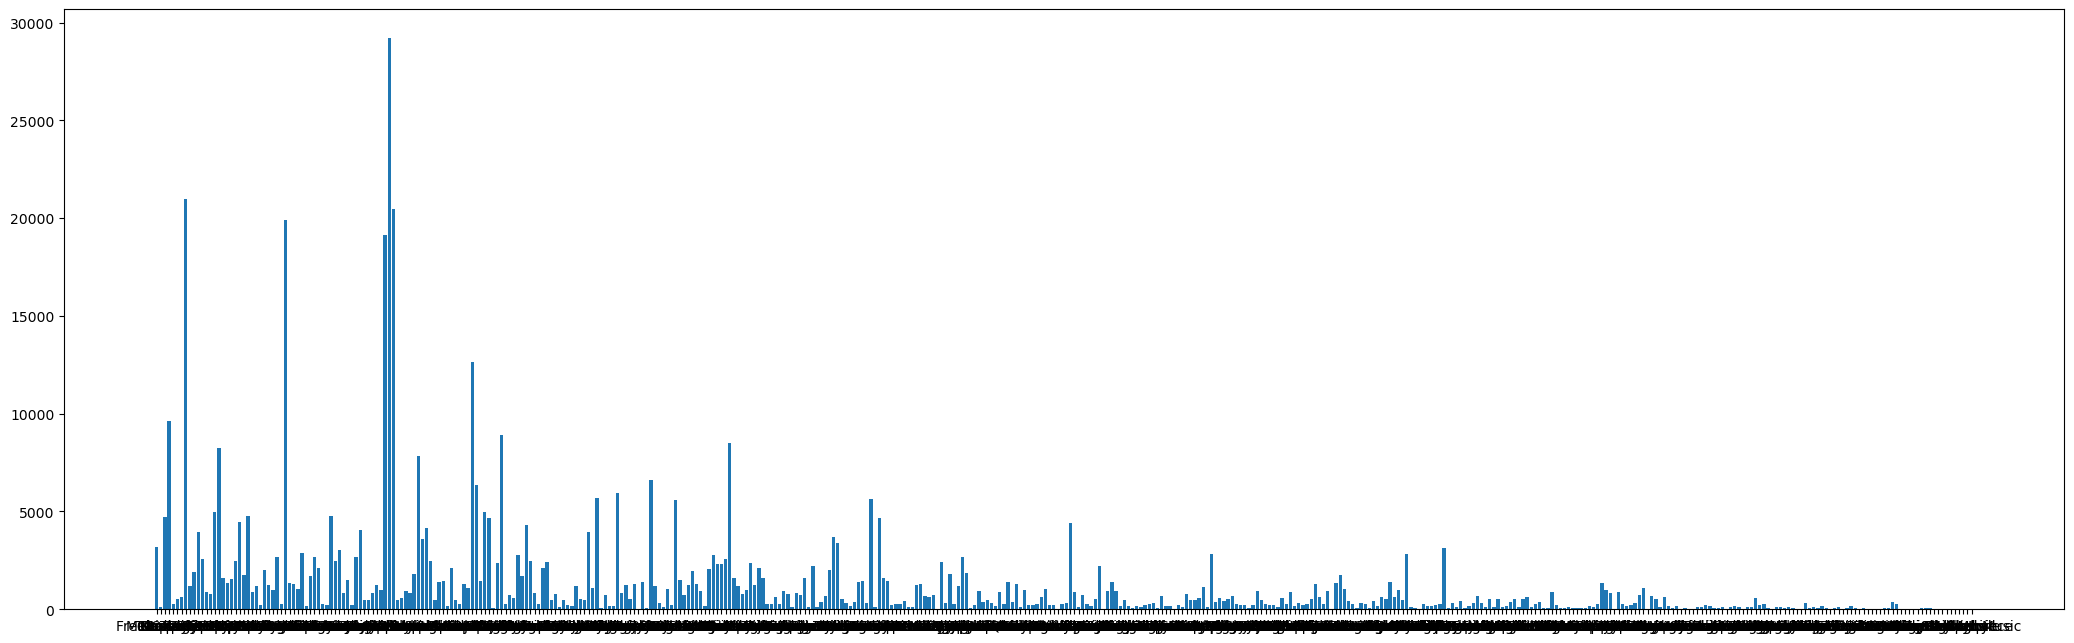

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
langs = tag_name.keys()
students = tag_name.values()
ax.bar(langs,students)
plt.show()

In [6]:
threshold = 1000
drop_num = 0
tag_use = []
for key in tag_name.keys():
    if tag_name[key] <= threshold:
        drop_num +=1
    else:
        tag_use.append(key)

In [7]:
print(drop_num)
print(len(tag_use))
print(tag_use)

312
126
['Free to Play', 'Multiplayer', 'Strategy', 'Action', 'Online Co-Op', 'PvP', 'Difficult', 'Co-op', 'Fantasy', 'RPG', 'Character Customization', 'Replay Value', 'Action RPG', 'FPS', 'Shooter', 'Tactical', 'First-Person', 'War', 'Realistic', 'Fast-Paced', 'Open World', 'Adventure', 'PvE', 'Walking Simulator', 'Crafting', 'Third Person', 'Sandbox', 'Violent', 'Sexual Content', 'Funny', 'Cartoony', 'Comedy', 'Cartoon', 'Survival', 'Sci-fi', 'Zombies', 'Post-apocalyptic', 'Singleplayer', 'Indie', 'Casual', 'Racing', 'Atmospheric', 'Great Soundtrack', 'Horror', 'Gore', 'Survival Horror', 'Local Co-Op', 'Space', 'Hack and Slash', 'Isometric', '2D', 'Pixel Graphics', 'Building', 'Exploration', 'Platformer', 'Physics', 'Simulation', '2D Platformer', 'Local Multiplayer', 'Family Friendly', 'Controller', 'Combat', 'VR', 'Historical', 'Relaxing', 'Dark Fantasy', '3D', 'Colorful', 'Short', 'Classic', 'Futuristic', 'Story Rich', 'Dungeon Crawler', 'Stealth', 'Cute', '3D Platformer', "1990's"

In [8]:
length = len(tag_use)
matrix = [[0 for i in range(length)] for i in range(length)]
for i, row in dataset_df.iterrows():
    tags = row["tags"]
    for idx, tag in enumerate(tags):
        if tag in tag_use:
            for i in range(idx+1,len(tags)):
                if tags[i] in tag_use:
                    idx1 = tag_use.index(tag)
                    idx2 = tag_use.index(tags[i])
                    matrix[idx1][idx2] += 1

In [9]:
maxi = np.amax(matrix)
for i in range(length):
    for j in range(length):
        matrix[i][j] = matrix[i][j]/maxi * 50

In [10]:
'''
GOAL: json
{
    "nodes": [{"id": "tagname1", "group": 1}],
    "links": [{"source": "tagname1", "target": "tagname2", "value": co-occurance}]
}
'''
links = []
for i in range(length):
    for j in range(length):
        if i == j: continue
        if matrix[i][j] < 5:continue
        val = {"source":tag_use[i],"target":tag_use[j],"value":matrix[i][j]}
        links.append(val)

In [11]:
nodes = []
for i, tag in enumerate(tag_use):
    val = {"id": tag, "group": i+1}
    nodes.append(val)

In [12]:
vis1_dict = {"nodes":nodes,"links":links}
# Serializing json
json_object = json.dumps(vis1_dict, indent=4)
 
# Writing to sample.json
with open("visualization/vis1.json", "w") as outfile:
    outfile.write(json_object)

## Parse data for visualization 2, world cloud of tags

In [24]:
##For now, only choose one year's tag to do the vis
tag_list = year_tag_dict[2018].keys()
tag_count_list = []

for i in list(year_tag_dict[2018].keys()):
    if year_tag_dict[2018][i] < 30:
        del year_tag_dict[2018][i]

for i in tag_list:
    tag_count_list.append(year_tag_dict[2018][i])

print(tag_count_list)
print(tag_list)

[440, 99, 187, 223, 1109, 427, 65, 261, 156, 187, 2980, 2860, 120, 384, 316, 52, 554, 210, 333, 352, 399, 213, 1244, 149, 95, 2605, 219, 1032, 167, 1806, 523, 108, 304, 574, 235, 762, 98, 143, 40, 196, 601, 65, 355, 87, 216, 75, 105, 175, 338, 893, 235, 68, 482, 127, 364, 44, 450, 82, 40, 115, 4930, 101, 114, 48, 52, 51, 81, 75, 55, 1321, 92, 143, 110, 41, 101, 34, 36, 121, 123, 109, 64, 169, 277, 65, 60, 57, 454, 208, 431, 169, 43, 145, 526, 48, 48, 393, 380, 85, 80, 81, 51, 86, 482, 213, 60, 138, 97, 30, 45, 48, 121, 341, 244, 53, 61, 53, 33, 32, 84, 173, 67, 425, 136, 43, 44, 190, 98, 120, 92, 127, 34, 93, 146, 508, 120, 33, 65, 66, 120, 41, 42, 51, 39, 99, 78, 45, 35, 30, 44, 45, 102, 415, 147, 90, 101, 85, 45, 130, 64, 532, 91, 40, 82, 217, 39, 53, 161, 30, 30, 113, 35, 31, 83, 139, 32, 37, 382, 30, 97, 56, 60, 85, 179, 56, 173, 63, 51, 32, 91, 34, 88, 237, 60, 138, 42, 103, 70, 105, 37, 31, 97, 35, 69, 65, 57, 160, 73, 44, 50, 98, 30, 41, 38, 32, 30, 91, 58]
dict_keys(['Multiplay

In [25]:
file = open('./visualization/WordCloud.txt','w')

for i in tag_list:
    tag_count = year_tag_dict[2018][i]
    for j in range(tag_count):
        file.write(i + ' ')

file.close()